# Breach Lyrics

In [543]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import squarify # pip install squarify
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px # Requires: pip install plotly


In [544]:
file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/BreachSongs2.xlsx'
df = pd.read_excel(file_path)

In [545]:
City_Walls = """Square up with me, I can take your right, throw a left
 Pair up with me, I'm a take you right to the chest
 Warpath etched in the surface
 Lines of the yellow tape, they're moving quiet like a
 Serpentine in a formation
 Buddy, that's my team, pretty impatient
 Now they're waiting on me
 It might be the furthest we've reached
 Now move it up, move it up, it's a breach

 I wonder where you are
 I wanted you to show me
 The way around the city walls
 The way on through
 I wonder where you are
 I wanted you to show me
 But now the night has fallen
 Abandoned by the sun

 Square up with me, I can come to you, tell me when
 Pair up with me, I can run on you, in the end
 I write a promise in pencil, but my loyalty's in pen
 Use a mistake as a crooked stencil, then we trace it back again
 From the mainland to the island of violence
 It was the same plan for a while, decided
 To send me up and rip you outta your seat
 You see, in a city with no entrance, there is not a retreat
 I'm wondering what you thought would happen, who you thought I would be
 Was this a sideswipe or did you picture this in a dream?
 Buckle down, this is possibly the furthest we've reached
 Now move it up, move it up, it's a breach

 I wonder where you are
 I wanted you to show me
 The way around the city walls
 The way on through
 I wonder where you are
 I wanted you to show me
 But now the night has fallen
 Abandoned by the sun
 Abandoned by the sun

 My smile wraps around my head, splitting it in
 Two, two, two, two
 I don't have a clue how I can keep the top half
 Glued, glued, glued, glued
  My smile wraps around my head, splitting it in
 Two, two, two, two
  I don't have a clue how I can keep the top half
 Glued, glued, glued, glued

  I wonder where you are
I wanted you to show me

 Entertain my, entertain my
 Entertain my, entertain my
 Entertain my, entertain my
 Entertain my, entertain my faith
  This is the last time, this is the last time
 Entertain my faith
 This is the last time that I try
 Address my soul, address my soul, address my soul
 Entertain my faith
 This is the last time that I try""",


RAWFEAR = """Raw fear
 Raw fear

 Raw fear moves me, sounds of empty Uzis
 Life is just forever nipping heels, never slowing down
 Raw fear moves me, sounds of empty Uzis
 Life is just forever gripping feels, never slowing down

 You know what scares me? Nah, it's stupid
 You've met my fears, they're all regulars
 Wait, who's the new kid?
 You know what kills me? Not getting stronger
 And now I can't seem to sit still any longer

 Raw fear moves me, sounds of empty Uzis
 Life is just forever nipping heels, never slowing down
 Raw fear moves me, sounds of empty Uzis
 Life is just forever gripping feels, never slowing down
 (I can't seem to sit still any longer)
 Raw fear moves me, sounds of empty Uzis
 Life is just forever gripping feels, never slowing down

 (Never slowing down)
 (Never slowing down)
 (Never, never slowing down)
 (Never slowing down)
 (Never, never slowing down)
 (Never slowing down)
 (Never, never slowing down)

 Learning all that really matters is a slow and painful lesson (Never slowing down, never slowing down)
 It is not pass or fail, but a poisonous progression (Never slowing down, never slowing down)
 Try to micro-dose to immunity but you'll never, ever get it (Never slowing down, never slowing down)
 And I go, ah, ah, ah (Never slowing down)
 What's the matter? isn't helping (Never slowing down)
 You go, ooh, ooh, ooh (Never slowing down)
 I wish her parents would stop yelling (Never slowing down)
 I could build a tower with the times I was pretending (Never slowing down)
 Try to micro-dose to immunity but I'll never see the ending (Never slowing down)
 And I go, ah, ah, ah (Never slowing down)
  What's the matter? isn't helping (Never slowing down)
 You go, ooh, ooh, ooh (Never slowing down)
 I wish her parents would stop yelling
 You know what scares me? (Ah, ah, ah)
 Nah, it's stupid
 And you go, ooh, ooh, ooh
 Wait, who's the new kid? (Never slowing down)
 And you go, ah, ah, ah
 Not getting stronger
 And now I can't seem to sit still any longer

 Raw fear moves me, sounds of empty Uzis (Ah, ah, ah)
 Life is just forever nipping heels, never slowing down
 Raw fear moves me, sounds of empty Uzis (Ah, ah, ah)
 Life is just forever gripping feels, never slowing down
 Raw fear moves me, sounds of empty Uzis (Ah, ah, ah)
 Life is just forever nipping heels, never slowing down
 Raw fear moves me, sounds of empty Uzis (Ah, ah, ah)
 Life is just forever gripping feels, never slowing down""",


Drum_Show = """Puttin' on a drum show
 Ooh-ooh

 Completed checklist for today
 Now they have to let you out of your cage
 Feelin' stuck between a rock and a home
 Two places you do not want to go

 So, so
 He's puttin' on a drum show

 Even now, even now, even now
 He'll take the longer way home
 Even now, even now, even now
 He'll never ever say so
 He drives fast just to feel it, feel it (Feel it)
 He drives slow if his song's not over (Feel it)
 Drown it out, drown it out

 Show
 Ooh-ooh

 He'd rather feel something than nothing at all
 So he swerves all around as his head starts to fall, turns it up
 Stuck between a rock and a home
 Two places he does not want to go

 So, so
 He's puttin' on a drum show

 Even now, even now, even now
 He'll take the longer way home (I've been this way)
 Even now, even now, even now
 He'll never ever say so (I want to change)
 He drives fast just to feel it, feel it (Feel it)
 He drives slow if his song's not over (Feel it)
 Drown it out, drown it out

 I've been this way
 I want to change
 I've been this way
 I want to change

 He's puttin' on a drum show

 Even now, even now, even now
 He'll take the longer way home (I've been this way)
 Even now, well even now, well even now
 He'll never ever say so (I want to change)
 He drives fast just to feel it, feel it (Feel it)
 He drives slow if his song's not over (I've been this way) (Feel it)
 Drown it out, drown it out (I want to change)

 I've been this way (Feel it, feel it)
 I want to change (Feel it, feel it)
  I've been this way (Feel it, feel it)
 I want to""",



Garbage = """I didn't do it

 I feel like garbage
 I feel like
 My systems are operating at twenty percent

 Or less
 I'll walk you through the numbers
 I'll show you nothing's left
 Oh-oh

( Yeah, yeah) I'm biting down on my shirtsleeve
( Yeah, yeah) I'll lash out if you're in arm's reach
 (Yeah, yeah) I'm so lost, like, what is happening?
 Like, like
 I feel like garbage

 Ooh, yeah

 I can't decide
  If I could feel more or I just knew less
When I was younger
 Bright-eyed with wonder
 Do you know which name it's under? (Oh-oh-oh)

 Or less
 I'll walk you through the numbers
 I'll show you nothing's left
 Oh-oh

 (Yeah, yeah) I'm biting down on my shirt sleeve
 (Yeah, yeah) I'll lash out if you're in arm's reach
 (Yeah, yeah) I'm so lost, like, what is happening?
 Like, what is happening?

 Would you move closer if I grew quieter?
 Maybe this is you
 Maybe you don't fix and you like it like this

 I feel like garbage (Yeah)
 I feel like garbage
 I feel like (Yeah)
 Like

 I'll lash out, lash out, lash out (Hey)
 I'm biting down on my shirt sleeve
 Like, I'll lash out, lash out, lash out
 Don't give up on me
 Don't give up on me
 No, no, no, please, please, please""",



The_Contract =  """I check the doors, check the windows and pull the blinds
 I check the clock, wondering what he'll pull this time
 I have a feeling that necromancer's outside
 And I'm just tryin' to stay quiet

 I don't sleep much, that's crazy, how'd you know that? (That)
 Keep myself up, that's maybe how you know that (That, that)
 Ooh, promises and contracts I used to keep
 I don't sleep much, that's crazy, how'd you know that? (That)
 Keep myself up, that's maybe how you know that (That, that)
 Ooh, my hallucination I used to see

 Wake up and I find out, did a change up
 Wait, did it change up?
 Is it light out yet? Better find out, bet
 I'ma walk around the edge of the room and the bed
 Where I hide my face, pace around
 Better try to breathe, pace around, pace around

 I check the doors, check the windows, and pull the blinds
 I check the clock, wondering what he'll pull this time
 I have a feeling that necromancer's outside
 And I'm just tryin' to stay quiet

 I don't sleep much, that's crazy, how'd you know that? (That)
 Keep myself up, that's maybe how you know that (That, that)
 Ooh, promises and contracts I used to keep
 I don't sleep much, that's crazy, how'd you know that? (That)
 Keep myself up, that's maybe how you know that (That, that)
 Ooh, my hallucination I used to see

I  used to see
 Sleep I found

 (Oh-ooh) I wanna get out there
 (Oh-ooh) But I don't try
 (Oh-ooh) I wanna get out there
 (Oh-ooh) But I don't try

 I check the clock, wondering what he'll pull this time
 I have a feeling that necromancer's outside
 And I'm just tryin' to stay quiet

 I don't sleep much, that's crazy, how'd you know that? (That)
 I keep myself up, that's maybe how you know that (That, that)
 Ooh, promises and contracts I used to keep
 I don't sleep much, that's crazy, how'd you know that? (That)
 Keep myself up, that's maybe how you know that (That, that)
 Ooh, my hallucination I used to see

 I used to see
 I used to see
 Ooh, my hallucination I used to see

 I used to see, it felt so real
 But now I plead, just take the deal
 I promised you a contract
 I promised you a contract""",



Downstairs = """You-ooh-ooh can have all I've made and all I've ever known
 You-ooh-ooh can have both my lungs if you ask me so
 Cause I-I-I want to be the one after your own heart
 And I-I-I might doubt the process like I doubted the start

 So I'm begging oh, oh-oh, oh-oh, mercy
 I'm begging oh, oh-oh, oh-oh, mercy

 Downstairs, I feel better in the cellar
 Down there, it's some shelter from the weather
 I wear all of my heart on my sleeve
 I'll take what I believe, and I'm hiding it
 Downstairs, I feel better in the cellar
 Down there, it's some shelter from the weather
 I wear all of my heart on my sleeve
 I'll take what I believe, and I'm hiding it

 Feeling like I'm nothing
 Feeling like I'm run down
 Was afraid of nothing
 Now I'm just ashamed how
 I hide my face from you

 So I'm begging oh, oh-oh, oh-oh, mercy
 I'm begging oh, oh-oh, oh-oh, mercy

 Downstairs, I feel better in the cellar
 Down there, it's some shelter from the weather
 I wear all of my heart on my sleeve
 I'll take what I believe, and I'm hiding it
 Downstairs, I feel better in the cellar
 Down there, it's some shelter from the weather
 I wear all of my heart on my sleeve
 I'll take what I believe, and I'm hiding it

 Oh, what have I become?
 Dirty and wretched one
 Am I unholy man?
 Have I forced your hand?

 Oh, woah-oh, woah-oh, mercy, yeah
 Oh, woah-oh, woah-oh, mercy, yeah

 Down there, it's some shelter from the weather
 I wear all of my heart on my sleeve
 I'll take what I believe, and I'm hiding it
 Downstairs, I feel better in the cellar
 Down there, it's some shelter from the weather
 I wear all of my heart on my sleeve
 I'll take what I believe, and I'm hiding it
 Downstairs (You can have), I feel better in the cellar (All I've made)
 Down there, need some shelter from the weather (All I've ever known)
 I wear (You can have) all of my heart on my sleeve (Both my lungs)
 I'll take what I believe, and I'm hiding it, yeah (If you ask me so, oh)
 And I'm hiding it, yeah ('Cause I want to be the one)
 And I'm hiding it, yeah (After your own heart)
 And I'm hiding it, yeah, oh (And I might doubt the process like I doubted the start)

 You can have all I've made and all I've ever known
 You can have both my lungs if you ask me so
 Cause I want to be the one after your own heart
 And I might doubt the process like I doubt the start""",



Robot_Voices = """They keep me company
 The robots and machines in my room
 An understanding
 The beeps and tones they make
 The only advice I take, the inside jokes are landing
 Now I'm waitin' for the changes, everyone sees
 Feeling so fancy

 And I just wanna dance and style and stay a while
 The lines on the floor, how did you find me?

 Woo
 I wasn't lookin' for love this year
 But my robot told me that I shouldn't fear
 When I met you, I found you safe and warm
 Then the robot voices would reassure me

 The half-drawn blinds casting lines on the floor as my metal friend flashes in time
 The daisy-chained power strips generating
 A newfound loneliness, I'm waiting for the changes, everyone sees
 Feeling so fancy

 And I just wanna dance and style and stay a while
 The lines on the floor, how did you find me?

 Woo
 I wasn't lookin' for love this year
 But my robot told me that I shouldn't fear
 When I met you, I found you safe and warm
 Then the robot voices would reassure me
 I wasn't lookin' for love this year
 But my robot told me that I shouldn't fear
 When I met you, I found you safe and warm
 Then the robot voices would reassure me""",



Center_Mass = """(Right)
 I figured out how it's on it (Right this way)
 It goes (Right)
 My death (Right this way)
 Girl, I really don't think you should take that (Stop it)

 A little softer than I used to be (Right)
 Used to mouth off often with artillery
 Now it is cough drops and soft spots in a middle seat (Right this way)
 Chivalry
 A tighter space than I used to know (Right)
 Spread out wide no more, pinch my shoulders close
 Hoping they misplace my reservation (Right this way), okay, okay

 I thought you had it figured out
 I know, I know
 You said you made it to the top
 I lied, I lied
 So, tell us, how did you make out alright?
 Well

 I pull on my shirtsleeve to cover half of my hands
 Bring my arms closer to my body, get as small as I can
 They call it center mass, that part they aim for
 Shrink it down to nothing and forgetting what the pain's for
 I pull on my shirtsleeve (My shirtsleeve), to cover half of my face (Half of my face)
 Bring my arms closer to my body, get as small as they say (Small as they say)
 They call it center mass, that part they aim for (For-for-for-for-for-for)

 Right this way if you're frustrated (Right)
 Your first mate in the fifth grade tried to persuade
 Try it once, he was shown on the bus (Right this way)
 Chain's off my huff, anxious enough as it is (Right)
 Gotta walk, never looking up once at the kids in the park
 What a day, getting dark, what a day (Right this way)
 Okay, okay

 I thought you had it figured out(I thought you had it figured out)
 I know, I know
 You said you made it to the top (You said you made it to the top)
 I lied, I lied
 So, tell us, how did you make out alright?
 Well

 I pull on my shirtsleeve (My shirtsleeve), to cover half of my hands (Half of my hands)
 Bring my arms closer to my body, get as small as I can (Small as I can)
 They call it center mass, that part they aim for
 Shrink it down to nothing and forgetting what the pain's for
 I  pull on my shirtsleeve (My shirtsleeve), to cover half of my face (Half of my face)
 Bring my arms closer to my body, get as small as they say (Small as they say)
 They call it center mass, that part they aim for

 Shrink it down to nothing and forgetting what the pain's for
 That part they aim for

 Found out what I'm worth, I run to you
 I hope you understand this run-on sentence
 My tattoos only hurt when meaning fades
 I think my skin got worse with good intentions
 I don't want to say what happened, I just want to let it go
 Nothing was the same right after, I went to the funeral
 I miss you so, so much, take what you want
 Take what you want from me
 Took you for granted
 They call it center mass, that part they aim for
 That part they aim for
 That part they aim for
 That part they aim for""",



Cottonwood = """Can't believe you're gone for good
 Someone chopped you down
 Thought you'd just fall in the woods
 But she heard that sound
 No, I don't, no, I don't remember
 Last we spoke
 No, I don't, no, I don't remember

 Remember
 Remember
 Remember

 I look back in time through a telescope
 I've been catching my
 I've been catching my
 My reflection already looking

 Most are blown down in a storm
 But the wind was tame
 You weren't waiting anymore
 Were you sad or brave?
 No I don't, no, I don't condemn you
 Back and forth
 No I don't, no, I don't condemn you

 Condemn you
 Condemn you
 Condemn you

 I look back in time through a telescope
 I've been catching my
 I've been catching my
 My reflection already looking

 You tore me up more than you know
 You tore me up more than you know
 You tore me up more than you know
 You tore me up

 I look back in time through a telescope
 I've been catching my
 I've been catching my
 My reflection already looking""",



One_Way = """I wanted to fly
 But they say a system's coming in
 The chances are high
 That this is a
 One way, one way, one way, one way

 Am I dreaming?
 If it's so
 Can I take back who I was before?
 If it's no
 Then all my dreams have
 Not been interesting in a while
 This has not been interesting in a while, while, while

 I wanted to fly
 But they say a system's coming in
 The chances are high
 That this is a
 One way, one way, one way, one way, one way (ooh)

 Me and my scene just ain't gelling
 Someone next to me keeps yelling
 Why am I still walking?
 Something must be wrong here
 I just don't belong here

 I wanted to fly
 But they say a system's coming in
 Chances are high
 That this is a
 One way, one way, one way, one way, one

 I wanted to fly
 But they say a system's coming in
 The chances are high
 That this is a
 One way, one way, one
 That this is a
 One way, one way, one
 That this is a
 One way, one way
 (This is a)""",



Days_Lie_Dormant = """Hey it's Josh, call me back
 I'm not opposed to """"One Way"""" going to """"Days Lie Dormant""""
 But it does feel like quite a vibe change
 And uhh""
 ""Ah

 You say, """"I should chase it""""
 I'll never say """"No""""
 Too narrow and too tight
 Somewhere you can't follow

 You say with your face
 Something else altogether

  My days lie dormant
 'Cause I just can't afford it
 To waste time in a city
 Where no one knows your name
 My days lie dormant
 'Cause I just can't afford it
 To waste my time inside a place you're not
 Don't make me waste my love
 It's everything I've got

 You say, Don't worry 'bout me though
 It looks so much warmer there
 And I should try Topo Chico
 And get some more sun

 But you say with your face
 Something else altogether

 My days lie dormant
 'Cause I just can't afford it
 To waste time in a city
 Where no one knows your name
 My days lie dormant
 'Cause I just can't afford it
 To waste my time inside a place you're not
 Don't make me waste my love
 It's everything I've got

 My days lie dormant
 Frozen and distorted
 Robbed of my momentum
 And suspended in the air
 My days lie dormant
 It's feeling less important
 To waste my time inside a place you're not
 Don't make me waste my love
 It's everything I've got
 Yeah-yeah-yeah-yeah
 Yeah-yeah-yeah-yeah
 Yeah-yeah-yeah-yeah
 Yeah-yeah-yeah-yeah

 My days lie dormant
 'Cause I just can't afford it
 To waste time in a city
 Where no one knows your name
 My days lie dormant
 'Cause I just can't afford it
 To waste my time inside a place you're not
 Don't make me waste my love
 It's everything I've got""",



Tally =  """I lost my rank and title
 I turned my back on it
 Sold it all at a discount (Yeah, yeah)
 I wanted to progress things
 I wanted my soul set free
 Lost it all at a discount (Yeah, yeah)

 You and I both know that's how the story goes
 We've seen it several times (Yeah, yeah)
 It's kinda hard to know, is there's a point at all?
 Or should we cut the line?

 You want a tally, I lost the count
 You want to love me, I'll let you down
 Still now, you believe in me somehow
 When I replay it in my mind
 I see your heartbreak every time
 Still now, you believe in me somehow

 You believe in me somehow
 You believe in me somehow

 I liken our fight to two lightning strikes strike on cue
 Like right when a storm hits, sights set (Yeah, yeah)
 Right set, circumstantial proof
 You should go your way, I should try mine
 Even though we both know
 We should just cut the line (Yeah, yeah)

 You want a tally, I lost the count
 You want to love me, I'll let you down
 Still now, you believe in me somehow
 When I replay it in my mind
 I see your heartbreak every time
 Still now, you believe in me somehow

 Somehow, somehow (Ooh, ooh)
 You believe in me somehow
 Ooh

 Ooh, somehow I figured you were keeping track of every time
 Just figured you were keeping track of every time
 I let you down, I breached your trust, I let you down
 Just figured you were keeping track of every time
 You were keeping track

 You want a tally, I lost the count (You want a tally)
 You want to love me (You want to love me), I'll let you down
 Still now (Still now), you believe in me somehow (You believe in me somehow)
 When I replay it in my mind (When I replay it)
 I see your heartbreak every time (I see your heartbreak)
 Still now (Still now), you believe in me somehow

 Yeah, yeah""",



Intentions = """I am starting it all over once again
 Did I learn a thing?
 (hoo-hoo-hoo, hoo-hoo-hoo, hoo-hoo-hoO)

 Intentions are everything
 (hoo-hoo-hoo, hoo-hoo-hoo, hoo-hoo-hoO)
 Intentions will set you free

 You will fail most every day and every way
 Did you learn a thing?
 (hoo-hoo-hoo, hoo-hoo-hoo, hoo-hoo-hoO)

 Intentions lack memory
 (hoo-hoo-hoo, hoo-hoo-hoo, hoo-hoo-hoO)
 Intentions will set you free

 Just try to be""",



Drag_Path = """When I see the devil's eyes
 A current travels down my spine
 He found me
 Seems as though I've lost again
 A story told at nauseam
 He found me
 Maybe once or twice or three
 He's tried his hand at drowning me
 But I'm still on fire
 At least I'm pretty sure

 When I see the devil's eyes
 I'll look away and smile wide
 You found me
 'Cause then I'll know you're also there
 'Cause proof is in the opposite
 You found me

 A drag path etched in the surface as evidence
 I left there on purpose a sad, sad
 Laying on the surface (Yeah)
 Can you find me? I dug my heels into the gravel as evidence
 For you to unravel a drag path etched in the surface (Yeah)
 Can you find me?

 What will you do?
 Please, please hurry
 What will you do?
 Please, please hurry

 Can you, can you, can you, can you?
 I'm trapped now, etched in the surface as evidence
 I'm left there on purpose, a sad sign, laying on the surface
 Can you, can you find, can you find me?
 I dug my heels into a gravel as evidence
 For you to unravel the drag path
 Etched in the surface

 Can you find me? (Can you find me?)
 Can you find me? (Can you find me?)
 Can you find me? (Can you find me?)
 Can you find me? (Can you find me?)

 Then the sun begins to rise
 We made it through the darkest night
 You found me"""

lyrics_list = [City_Walls, RAWFEAR, Drum_Show, Garbage, The_Contract, Downstairs, Robot_Voices, Center_Mass, Cottonwood, One_Way, Days_Lie_Dormant, Tally, Intentions, Drag_Path]

In [546]:
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "he", "him", "his", "she", "her", "it", "its", "they", "them",
    "their", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once", "not", "no", "yes", "so", "can", "just", "wanted", "where",
    "dont", "yeah", "let", "im", "ah", "want", "like", "ive", "all", "ooh", "ill", "even", "forforforforforfor", "every", "hoohoohoo", "hell",
    "yeahyeahyeahyeah", "daisychained", "thats", "there", "how", "somehow", "when", "used", "cant"
]

# Function to remove stop words from a string
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

### Create all_processed_words list

In [547]:
import re
from collections import Counter

# 1. Group all your song variables into one list
# Replace these placeholder names with your actual 14 variables
songs_to_process = [City_Walls, RAWFEAR, Drum_Show, Garbage, The_Contract, Downstairs, Robot_Voices, Center_Mass, Cottonwood, One_Way, Days_Lie_Dormant, Tally, Intentions, Drag_Path] # Add all 14 song variables here

# This list will store the 'list of words' for each song
all_processed_words = []

# 2. Loop through the list to process each song automatically
for song in songs_to_process:
    # Handle the tuple check for each individual song to avoid AttributeError
    text_to_process = song[0] if isinstance(song, tuple) else song

    # Normalize: lowercase and remove punctuation
    clean_lyrics = re.sub(r'[^\w\s]', '', text_to_process.lower())

    # Filter: Use your remove_stopwords function
    filtered_lyrics = remove_stopwords(clean_lyrics)

    # Split: Break the string into a list of words
    words = filtered_lyrics.split()

    # Add this song's word list to our collection
    all_processed_words.append(words)

# 3. Tally: Count occurrences across ALL songs combined
flattened_list = [word for song_list in all_processed_words for word in song_list]
counts = Counter(flattened_list)

# 4. Output: View the most frequent meaningful words in the discography
print("Top 10 words across all songs:")
print(counts.most_common(10))

Top 10 words across all songs:
[('way', 43), ('never', 42), ('now', 39), ('feel', 33), ('slowing', 32), ('one', 30), ('know', 28), ('time', 24), ('take', 18), ('right', 18)]


### LDA training code

In [548]:
import gensim
from gensim import corpora

# 1. Create the Dictionary
# This maps every unique word to an ID
dictionary = corpora.Dictionary(all_processed_words)

# 2. Create the Corpus
# This converts each song into a "Bag of Words" format (word_id, frequency)
corpus = [dictionary.doc2bow(text) for text in all_processed_words]

# 3. Train the LDA Model
# We use 3 topics because 14 songs is a smaller sample size
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    random_state=100,
    update_every=1,
    chunksize=10, # Adjusted for your 14 songs
    passes=20,    # Increased passes to help the model find patterns in a small dataset
    alpha='auto'
)

# 4. Show the discovered Topics
print("--- Discovered Lyrical Themes ---")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}\n")

--- Discovered Lyrical Themes ---
Topic 0: 0.036*"now" + 0.030*"never" + 0.030*"believe" + 0.024*"slowing" + 0.022*"still" + 0.019*"feel" + 0.015*"time" + 0.013*"lost" + 0.011*"see" + 0.010*"way"

Topic 1: 0.037*"waste" + 0.036*"one" + 0.030*"lie" + 0.030*"days" + 0.030*"dormant" + 0.026*"way" + 0.024*"time" + 0.021*"say" + 0.020*"cause" + 0.020*"afford"

Topic 2: 0.028*"find" + 0.016*"know" + 0.014*"found" + 0.014*"surface" + 0.011*"right" + 0.011*"please" + 0.010*"see" + 0.009*"etched" + 0.009*"evidence" + 0.008*"keep"



### Topic Model

In [549]:
import gensim
from gensim import corpora

# 1. Create the Dictionary
# This maps every unique word to a unique ID
dictionary = corpora.Dictionary(all_processed_words)

# 2. Create the Corpus
# This converts each song into a list of (word_id, word_frequency)
corpus = [dictionary.doc2bow(text) for text in all_processed_words]

# 3. Train the LDA Model
# We use 5 topics as a starting point for 14 songs
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=100,
    passes=20,     # More passes help with small datasets
    alpha='auto',  # Let the model learn the topic distribution
    per_word_topics=True
)

# 4. Display the Topics and their Top Words
print("--- Discovered Lyrical Themes ---")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx}: {topic}\n")

--- Discovered Lyrical Themes ---
Topic 0: 0.064*"never" + 0.052*"slowing" + 0.036*"now" + 0.031*"feel" + 0.020*"find" + 0.018*"fear" + 0.018*"raw" + 0.016*"way" + 0.015*"sounds" + 0.015*"life"

Topic 1: 0.038*"waste" + 0.031*"dormant" + 0.031*"lie" + 0.031*"days" + 0.024*"time" + 0.021*"cause" + 0.021*"afford" + 0.018*"say" + 0.018*"everything" + 0.014*"one"

Topic 2: 0.024*"know" + 0.021*"keep" + 0.019*"entertain" + 0.017*"see" + 0.015*"two" + 0.015*"glued" + 0.015*"around" + 0.015*"maybe" + 0.015*"lash" + 0.013*"time"

Topic 3: 0.025*"believe" + 0.023*"right" + 0.015*"now" + 0.015*"hiding" + 0.015*"take" + 0.015*"heart" + 0.013*"oh" + 0.013*"part" + 0.013*"aim" + 0.012*"ohoh"

Topic 4: 0.058*"one" + 0.050*"way" + 0.016*"catching" + 0.016*"robot" + 0.013*"back" + 0.013*"remember" + 0.013*"condemn" + 0.011*"say" + 0.011*"time" + 0.011*"fly"



In [550]:
topic_labels = {
    0: "Temporal Persistence: Faith & Resilience",
    1: "Vulnerable Rawness: Emotional Exposure",
    2: "Tangible Evidence: Search for Truth",
    3: "Stagnation & Regret: Wasted Time",
    4: "Calculated Intent: Path & Purpose"
}

In [551]:
for i, topic in enumerate(lda_model.print_topics()):
    print(f"Topic {i} ({topic_labels[i]}): {topic}")

Topic 0 (Temporal Persistence: Faith & Resilience): (0, '0.064*"never" + 0.052*"slowing" + 0.036*"now" + 0.031*"feel" + 0.020*"find" + 0.018*"fear" + 0.018*"raw" + 0.016*"way" + 0.015*"sounds" + 0.015*"life"')
Topic 1 (Vulnerable Rawness: Emotional Exposure): (1, '0.038*"waste" + 0.031*"dormant" + 0.031*"lie" + 0.031*"days" + 0.024*"time" + 0.021*"cause" + 0.021*"afford" + 0.018*"say" + 0.018*"everything" + 0.014*"one"')
Topic 2 (Tangible Evidence: Search for Truth): (2, '0.024*"know" + 0.021*"keep" + 0.019*"entertain" + 0.017*"see" + 0.015*"two" + 0.015*"glued" + 0.015*"around" + 0.015*"maybe" + 0.015*"lash" + 0.013*"time"')
Topic 3 (Stagnation & Regret: Wasted Time): (3, '0.025*"believe" + 0.023*"right" + 0.015*"now" + 0.015*"hiding" + 0.015*"take" + 0.015*"heart" + 0.013*"oh" + 0.013*"part" + 0.013*"aim" + 0.012*"ohoh"')
Topic 4 (Calculated Intent: Path & Purpose): (4, '0.058*"one" + 0.050*"way" + 0.016*"catching" + 0.016*"robot" + 0.013*"back" + 0.013*"remember" + 0.013*"condemn" +

### Quantify the vibe of each song

In [552]:
import pandas as pd

def get_dominant_topic(ldamodel, corpus):
    # Initialize a list to hold our data
    topic_data = []

    # Iterate through each song in the corpus
    for i, row in enumerate(ldamodel[corpus]):
        # The row contains a list of (topic_id, probability) tuples
        # Sort it so the highest probability is first
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)

        # Get the top topic ID and its percentage
        topic_num, prop_topic = row[0]

        # Add to our list
        topic_data.append([i, int(topic_num), round(prop_topic, 4)])

    return pd.DataFrame(topic_data, columns=['Song_ID', 'Dominant_Topic', 'Topic_Perc_Contribution'])

# 2. Generate the Dataframe
df_topics = get_dominant_topic(lda_model, corpus)

# 3. Combine with your song names (if you have them in a list)
song_names = ["City Walls", "RAWFEAR", "Drum Show", "Garbage", "The Contract",
    "Downstairs", "Robot Voices", "Center Mass", "Cottonwood",
    "One Way", "Days Lie Dormant", "Tally", "Intentions", "Drag Path"] # Add all 14 names
df_topics['Song_Name'] = song_names[:len(df_topics)]

# Display the final table
print(df_topics[['Song_Name', 'Dominant_Topic', 'Topic_Perc_Contribution']])

           Song_Name  Dominant_Topic  Topic_Perc_Contribution
0         City Walls               2                   0.9995
1            RAWFEAR               0                   0.9996
2          Drum Show               0                   0.9993
3            Garbage               2                   0.9988
4       The Contract               2                   0.9994
5         Downstairs               3                   0.9995
6       Robot Voices               4                   0.9991
7        Center Mass               3                   0.9996
8         Cottonwood               4                   0.9987
9            One Way               4                   0.9989
10  Days Lie Dormant               1                   0.9993
11             Tally               3                   0.9993
12        Intentions               1                   0.9958
13         Drag Path               0                   0.9991


Discovered Lyrical Themes
Topic 0: Persistent Reminiscing Focuses on the passage of time, keeping score of past hurts ("tally," "track," "replay"), and the struggle to "believe" while feeling "lost" in heartbreak.

Topic 1: Unfiltered Vulnerability Centers on raw emotions and internal conflict, specifically the refusal to slow down despite "fear" and the "raw" feeling of "hiding" one's heart.

Topic 2: Searching for Proof Reflects a quest for clarity or "evidence," using imagery of things being "etched" on the "surface" to "find" or "know" the truth.

Topic 3: Regret and Stagnation Deals with the anxiety of "wasting" time and "days" lying "dormant," highlighting the realization that one cannot "afford" to let more time slip away.

Topic 4: Direction and Intent Explores the path forward ("way") and the internal "intentions" or "aim" behind one's actions, balancing "right" and "will."

In [568]:
# Create a new column for the descriptive label
df_topics['Topic_Label'] = df_topics['Dominant_Topic'].map(topic_labels)

# Displaying the final organized table
print(df_topics[['Song_Name', 'Topic_Label', 'Topic_Perc_Contribution']])

           Song_Name                               Topic_Label  \
0         City Walls       Tangible Evidence: Search for Truth   
1            RAWFEAR  Temporal Persistence: Faith & Resilience   
2          Drum Show  Temporal Persistence: Faith & Resilience   
3            Garbage       Tangible Evidence: Search for Truth   
4       The Contract       Tangible Evidence: Search for Truth   
5         Downstairs          Stagnation & Regret: Wasted Time   
6       Robot Voices         Calculated Intent: Path & Purpose   
7        Center Mass          Stagnation & Regret: Wasted Time   
8         Cottonwood         Calculated Intent: Path & Purpose   
9            One Way         Calculated Intent: Path & Purpose   
10  Days Lie Dormant    Vulnerable Rawness: Emotional Exposure   
11             Tally          Stagnation & Regret: Wasted Time   
12        Intentions    Vulnerable Rawness: Emotional Exposure   
13         Drag Path  Temporal Persistence: Faith & Resilience   

    Topic

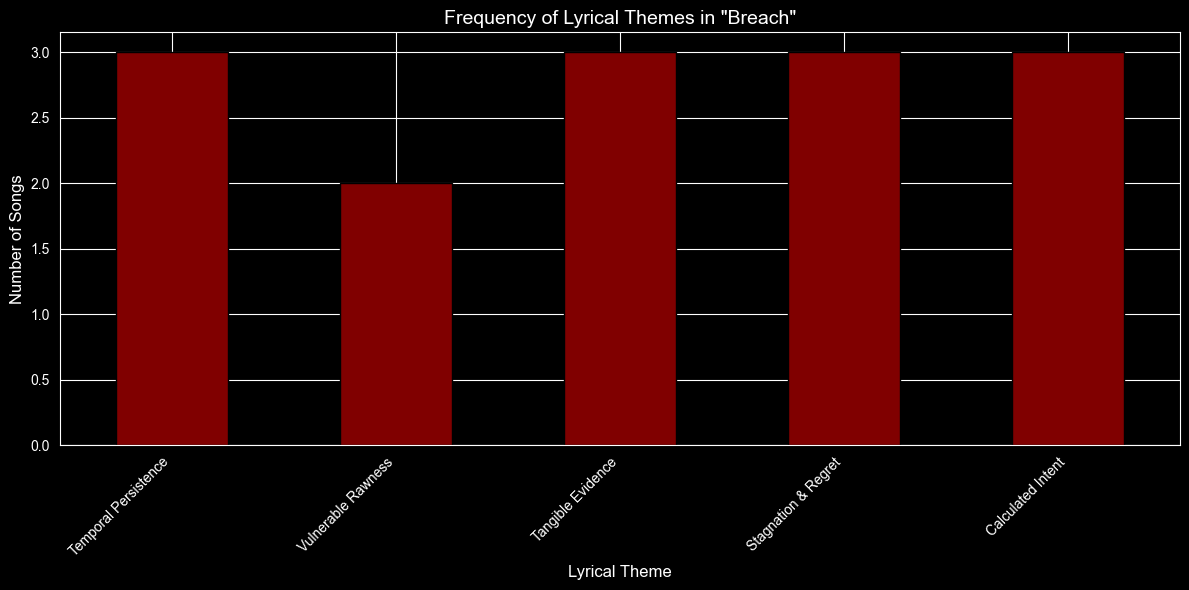

In [570]:
import matplotlib.pyplot as plt

# 1. Ensure the mapping is applied (if not already done)
topic_labels = {
    0: "Temporal Persistence",
    1: "Vulnerable Rawness",
    2: "Tangible Evidence",
    3: "Stagnation & Regret",
    4: "Calculated Intent"
}
df_topics['Topic_Label'] = df_topics['Dominant_Topic'].map(topic_labels)

# 2. Count the occurrences of each label
# We use the list of values from our dictionary to keep the 0-4 order
ordered_labels = [topic_labels[i] for i in range(5)]
topic_counts = df_topics['Topic_Label'].value_counts().reindex(ordered_labels).fillna(0)

# 3. Create the bar chart
plt.figure(figsize=(12, 6))
topic_counts.plot(kind='bar', color='maroon', edgecolor='black')

plt.title('Frequency of Lyrical Themes in "Breach"', fontsize=14)
plt.xlabel('Lyrical Theme', fontsize=12)
plt.ylabel('Number of Songs', fontsize=12)

# Set the x-ticks to your specific labels
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

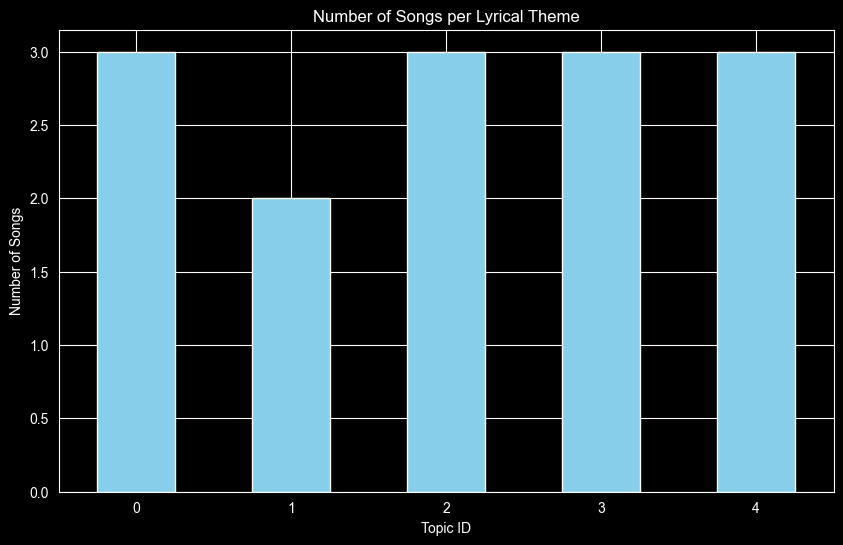

In [567]:
import matplotlib.pyplot as plt

# Count how many songs fall into each topic
topic_counts = df_topics['Dominant_Topic'].value_counts().sort_index()

# Simple bar chart
plt.figure(figsize=(10,6))
topic_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Songs per Lyrical Theme')
plt.xlabel('Topic ID')
plt.ylabel('Number of Songs')
plt.xticks(rotation=0)
plt.show()

### Breach Bar Chart

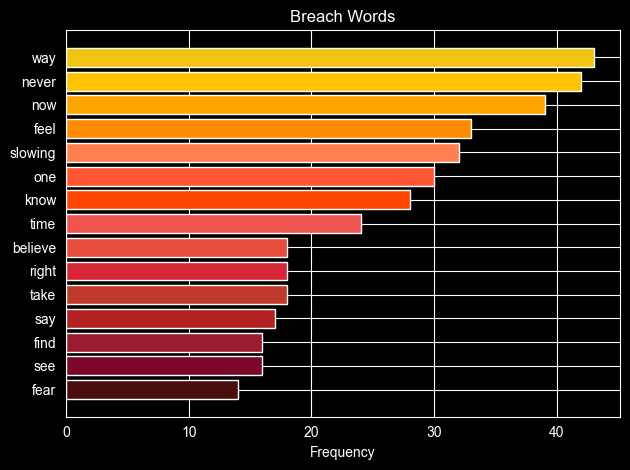

In [554]:
# Convert your Counter object to a sorted DataFrame
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
df_counts = df_counts.sort_values(by='Count', ascending=True)

# Define Red/Orange/Yellow palette
# You can add as many hex codes as you like to get the exact look
warm_colors = [
    '#4A0E0E', # Dark Garnet
    '#7B0828', # Deep Ruby
    '#9B1B30', # Chili Pepper
    '#B22222', # Firebrick
    '#C0392B', # Pomegranate
    '#D72638', # Crimson
    '#E74C3C', # Alizarin
    '#F0544F', # Soft Coral
    '#FF4500', # Orange Red
    '#FF5733', # Persimmon
    '#FF7F50', # Coral
    '#FF8C00', # Dark Orange
    '#FFA500', # Orange
    '#FFC300', # Sunflower
    '#F1C40F'  # Maize
]

# Create the plot
plt.barh(df_counts['Word'], df_counts['Count'], color=warm_colors)
plt.xlabel('Frequency')
plt.title('Breach Words')
plt.tight_layout()

# Save or display
plt.savefig('breach.png')

### Breach Lollipop

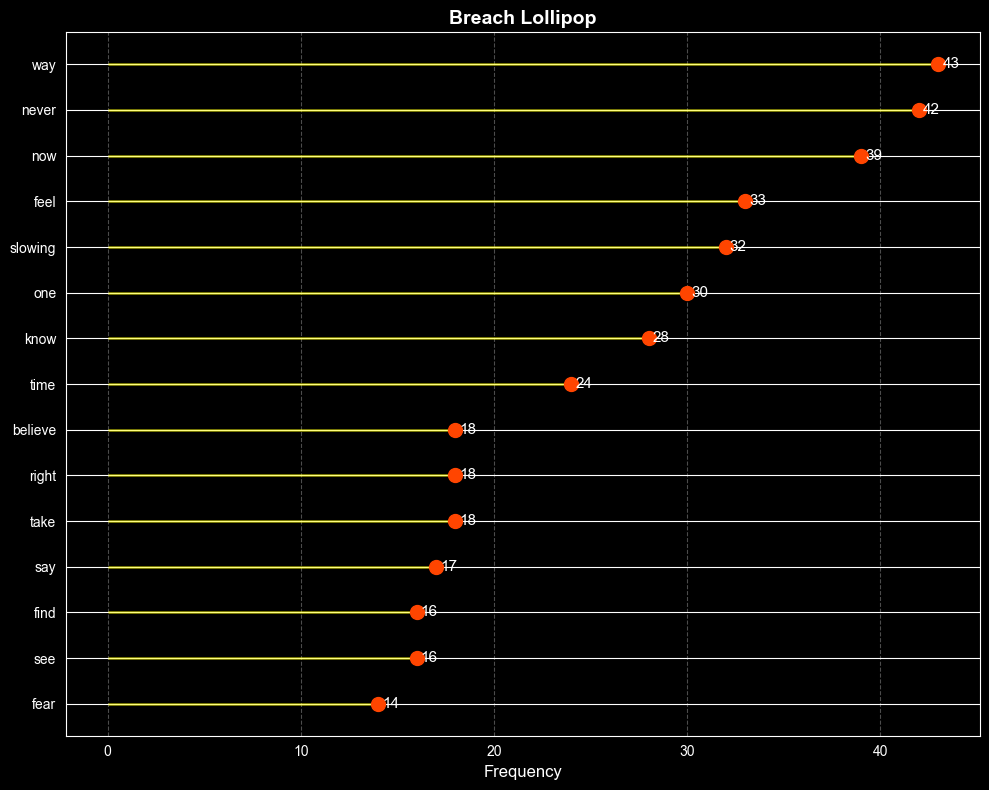

In [555]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
# Sorting ensures the "longest" lollipops are at the top
df_counts = df_counts.sort_values(by='Count', ascending=True)

# 2. Create the plot
plt.figure(figsize=(10, 8))

# Draw the "stems" (horizontal lines)
plt.hlines(y=df_counts['Word'], xmin=0, xmax=df_counts['Count'], color='yellow', alpha=0.5, linewidth=2)

# Draw the "candies" (the dots)
plt.plot(df_counts['Count'], df_counts['Word'], "o", markersize=10, color='orangered')

# 3. Styling
plt.xlabel('Frequency', fontsize=12)
plt.title('Breach Lollipop', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3) # Horizontal grids help track the values

# Add labels to the end of the dots (optional)
for i, count in enumerate(df_counts['Count']):
    plt.text(count + 0.2, i, str(count), va='center', fontsize=11)

plt.tight_layout()

# 4. Save or display
plt.savefig('breach_lollipop.png')
plt.show()

### Breach Bubble Chart

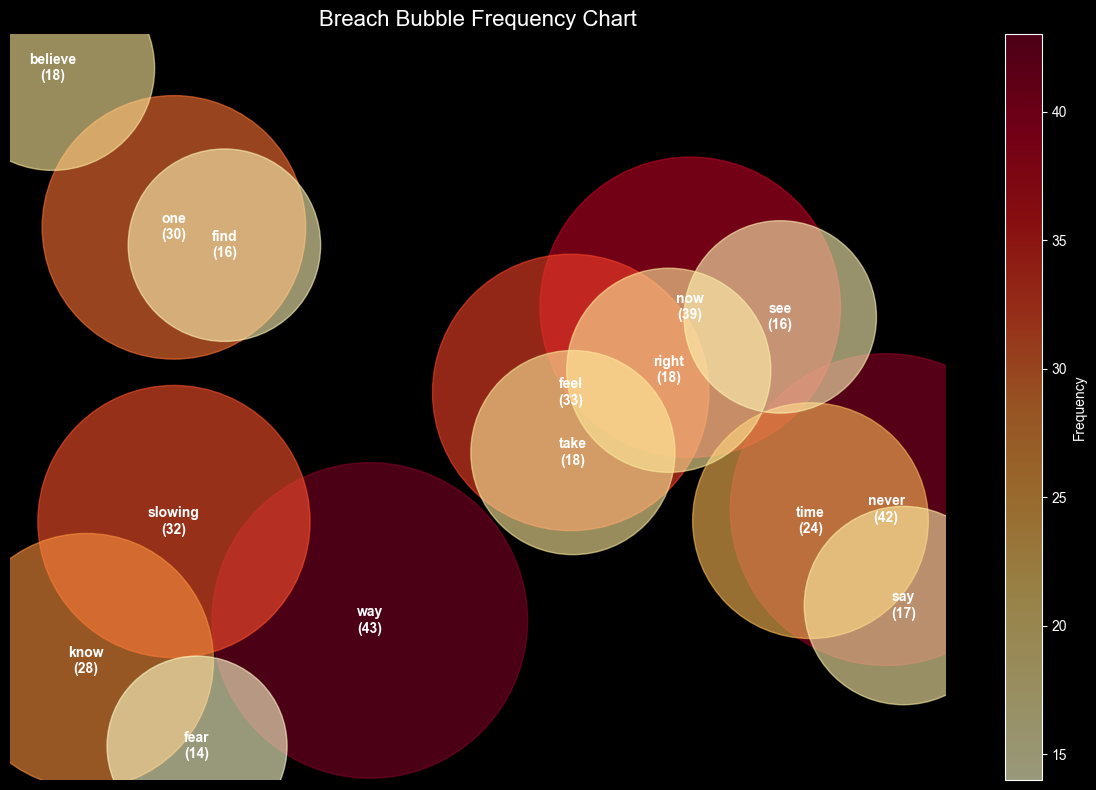

In [556]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Setup positions for the bubbles (random or ordered)
# We use random X and Y coordinates to spread the bubbles out
np.random.seed(42) # Keeps the layout the same every time you run it
df_counts['x'] = np.random.rand(15)
df_counts['y'] = np.random.rand(15)

# 3. Create the plot
plt.figure(figsize=(12, 8))

# Squaring the count allows for more dramatic size differences
df_counts['size'] = df_counts['Count'] ** 2

# s= size of bubbles (multiplied by a factor to make them visible)
# c= color (can be mapped to the count)
scatter = plt.scatter(
    df_counts['x'],
    df_counts['y'],
    s=df_counts['Count'] * 1200,  # Adjust the multiplier (100) based on your data scale
    c=df_counts['Count'],
    cmap='YlOrRd',
    alpha=0.6,
)

# 4. Add the word labels inside or near the bubbles
for i, row in df_counts.iterrows():
    plt.annotate(
        f"{row['Word']}\n({row['Count']})",
        (row['x'], row['y']),
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# 5. Styling
plt.title('Breach Bubble Frequency Chart', fontsize=16)
plt.axis('off') # Hide axes for a cleaner "cloud" look
plt.colorbar(scatter, label='Frequency') # Optional: adds a color scale legend

plt.tight_layout()
plt.savefig('breach_bubble.png')
plt.show()

### Breach Tree Map

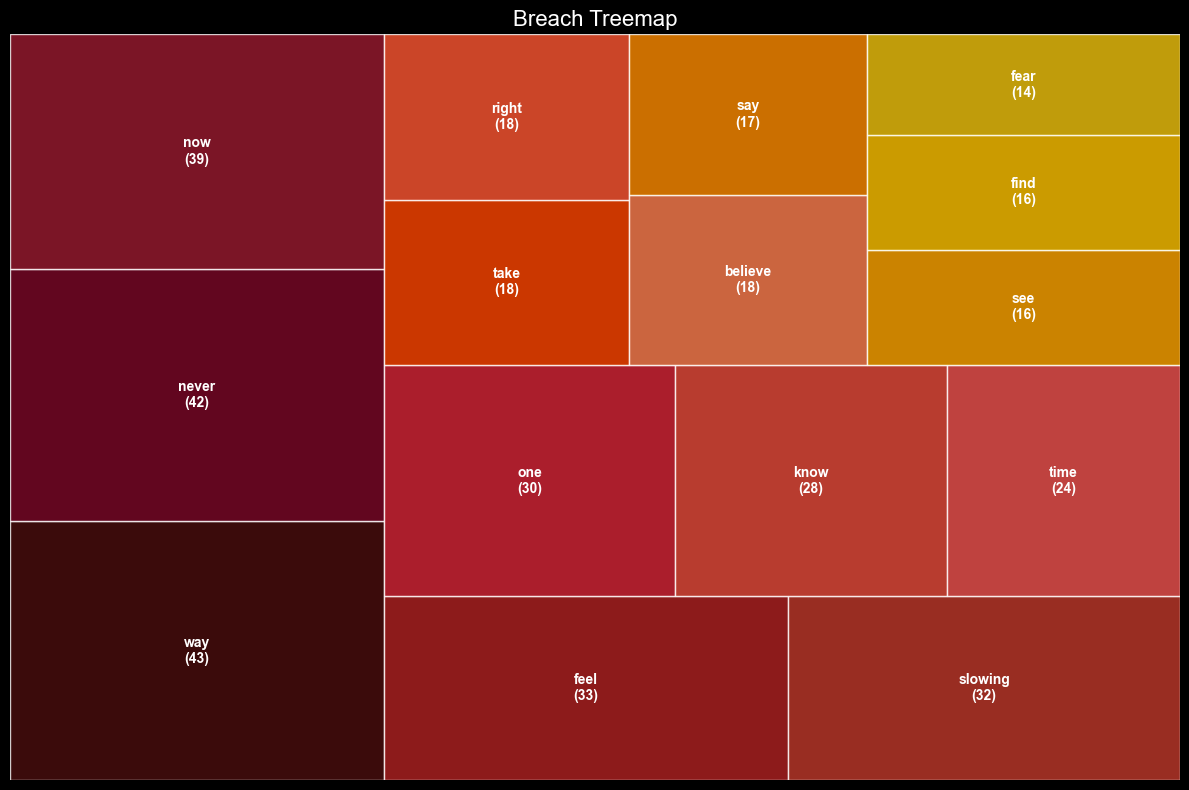

In [557]:
# 1. Prepare your data (from your existing Counter object)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Create the plot
plt.figure(figsize=(12, 8))

# Define colors (using a nice Seaborn palette)
colors = sns.color_palette('viridis', len(df_counts))

# Create labels that include the word and the count
labels = [f"{row['Word']}\n({row['Count']})" for i, row in df_counts.iterrows()]

# 3. Draw the Treemap
squarify.plot(
    sizes=df_counts['Count'],
    label=labels,
    color=warm_colors,
    alpha=0.8,
    text_kwargs={'fontsize': 10, 'fontweight': 'bold'}
)

# 4. Styling
plt.title('Breach Treemap', fontsize=16)
plt.axis('off') # Treemaps don't need axes

plt.tight_layout()
plt.savefig('breach_treemap.png')
plt.show()

### Breach Word Cloud

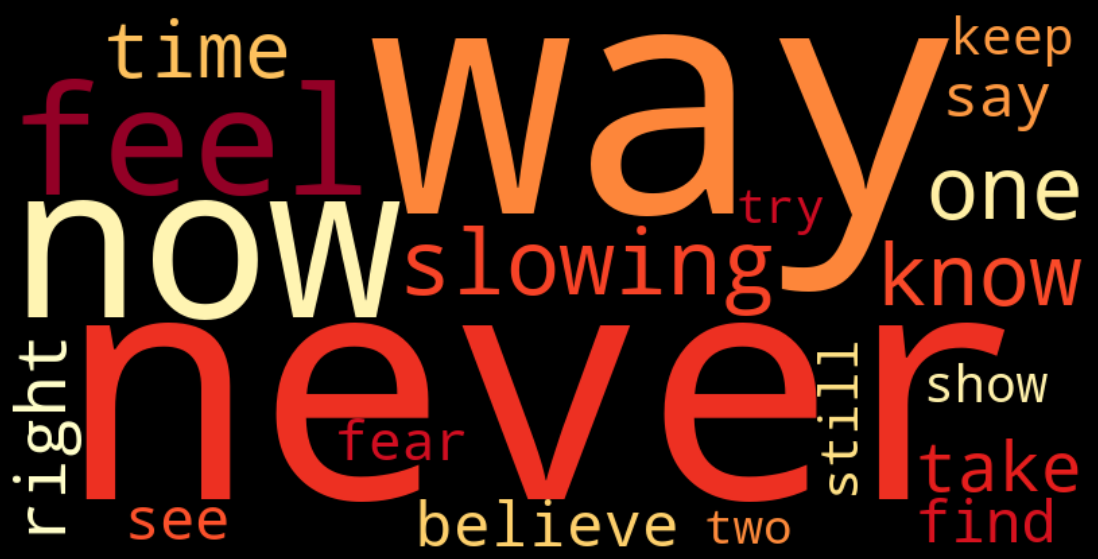

In [558]:
# Join all words into one string weighted by their count
word_freq = dict(counts.most_common(20))

wordcloud = WordCloud(
    width=800,
    height=400,
    colormap='YlOrRd'
).generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Breach Radial Bar Chart

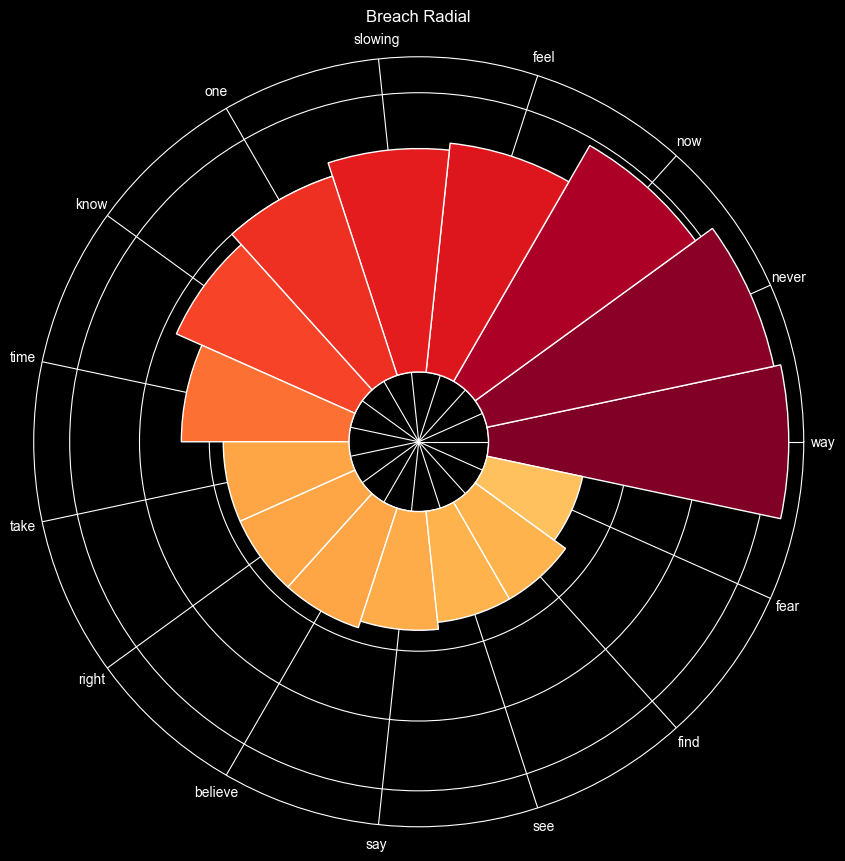

In [559]:
# Prepare data
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
n = len(df_counts)
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
widths = [2 * np.pi / n] * n

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Create the bars
bars = ax.bar(angles, df_counts['Count'], width=widths, bottom=10,
              color=plt.cm.YlOrRd(df_counts['Count'] / df_counts['Count'].max()),
              edgecolor='white')

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels(df_counts['Word'], fontsize=10)
ax.set_yticklabels([]) # Hide radial grid numbers
plt.title("Breach Radial", va='bottom')
plt.show()

### Breach Funnel Chart

In [560]:
import plotly.express as px
import pandas as pd

df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

fig = px.funnel(df_counts,
                x='Count',
                y='Word',
                title='Top 15 Lyrics Word Frequency',
                color='Word',
                color_discrete_sequence=warm_colors)

fig.show()

### Breach Words by Length

In [561]:
# 1. Ensure we have a list of words, not just one long string
# We split by whitespace to get actual words
if isinstance(filtered_lyrics, str):
    word_list = filtered_lyrics.split()
else:
    word_list = filtered_lyrics

word_lengths = {}

# 2. Categorize
for word in word_list:
    # Skip empty strings if any
    if not word:
        continue

    length = len(word)
    if length not in word_lengths:
        word_lengths[length] = []

    word_lengths[length].append(word)

# 3. Display the results correctly
print(f"Total words processed: {len(word_list)}")
print("-" * 30)

for length in sorted(word_lengths.keys()):
    # Get unique examples so we don't see the same word 5 times
    unique_words = list(set(word_lengths[length]))
    count = len(word_lengths[length])
    examples = unique_words[:5]

    print(f"Length {length:2}: {count:4} words found. Examples: {examples}")

Total words processed: 109
------------------------------
Length  3:   10 words found. Examples: ['now', 'see', 'sad', 'hes', 'dug']
Length  4:   37 words found. Examples: ['away', 'eyes', 'look', 'path', 'also']
Length  5:   24 words found. Examples: ['least', 'proof', 'youre', 'cause', 'maybe']
Length  6:   17 words found. Examples: ['devils', 'etched', 'gravel', 'begins', 'please']
Length  7:   15 words found. Examples: ['purpose', 'darkest', 'trapped', 'unravel', 'current']
Length  8:    6 words found. Examples: ['drowning', 'evidence', 'opposite']


In [562]:
from collections import Counter

print("--- TOP 5 WORDS BY LENGTH (1-14) ---")

# Loop through lengths 1 to 14
for length in range(1, 15):
    # Check if we actually have words of this length to avoid errors
    if length in word_lengths and word_lengths[length]:
        counts = Counter(word_lengths[length])
        top_words = counts.most_common(5)

        # Formatting the output for readability
        word_list_str = ", ".join([f"'{word}' ({count})" for word, count in top_words])
        print(f"Length {length:2}: {word_list_str}")
    else:
        print(f"Length {length:2}: No words found.")

--- TOP 5 WORDS BY LENGTH (1-14) ---
Length  1: No words found.
Length  2: No words found.
Length  3: 'sad' (3), 'see' (2), 'dug' (2), 'hes' (1), 'now' (1)
Length  4: 'find' (12), 'drag' (3), 'path' (3), 'eyes' (2), 'left' (2)
Length  5: 'found' (5), 'cause' (2), 'heels' (2), 'hurry' (2), 'spine' (1)
Length  6: 'etched' (4), 'please' (4), 'devils' (2), 'laying' (2), 'gravel' (2)
Length  7: 'surface' (6), 'purpose' (2), 'unravel' (2), 'current' (1), 'travels' (1)
Length  8: 'evidence' (4), 'drowning' (1), 'opposite' (1)
Length  9: No words found.
Length 10: No words found.
Length 11: No words found.
Length 12: No words found.
Length 13: No words found.
Length 14: No words found.


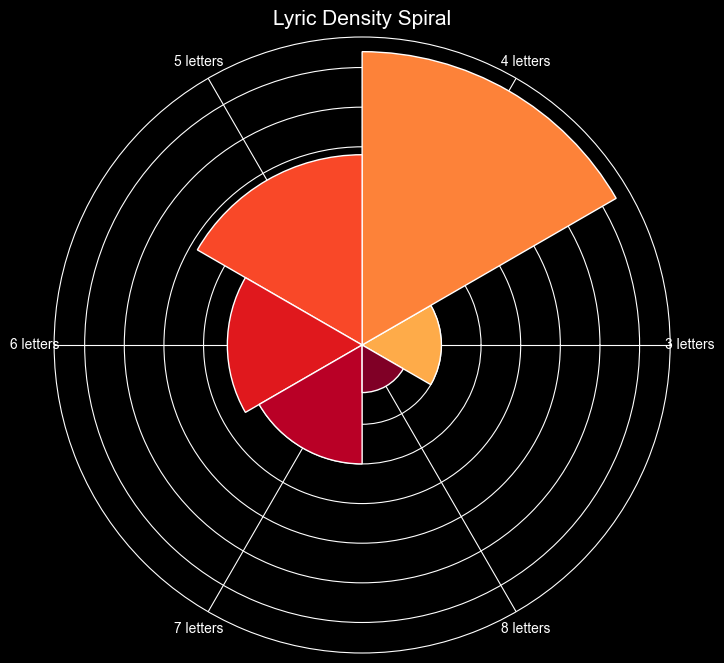

In [563]:
import numpy as np

# Prepare data
lengths = sorted(word_lengths.keys())
counts = [len(word_lengths[l]) for l in lengths]

# Set up the polar projection
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

# Create the angles for the bars
angles = np.linspace(0, 2 * np.pi, len(lengths), endpoint=False)
width = (2 * np.pi) / len(lengths)

# Use your expanded reds for the colors
colors = plt.cm.YlOrRd(np.linspace(0.4, 1, len(lengths)))

bars = ax.bar(angles, counts, width=width, color=colors, edgecolor='white')

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels([f"{l} letters" for l in lengths])
ax.set_yticklabels([]) # Hide the radial grids for a cleaner look
plt.title("Lyric Density Spiral", va='bottom', fontsize=15)
plt.show()

### Breach Statistical Distribution of Word Lengths

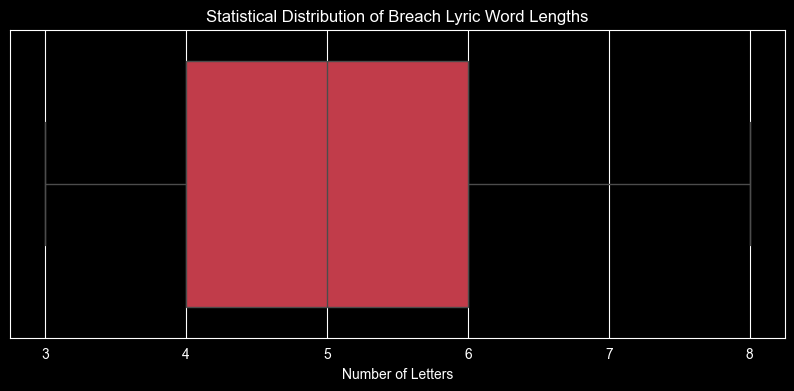

In [564]:
import seaborn as sns

# Create a list of the lengths of every word in your dataset
lengths_data = [len(w) for w in word_list]

plt.figure(figsize=(10, 4))
sns.boxplot(x=lengths_data, color="#D72638")
plt.title('Statistical Distribution of Breach Lyric Word Lengths')
plt.xlabel('Number of Letters')
plt.show()

### Breach Word Cloud Color-Coded by Length

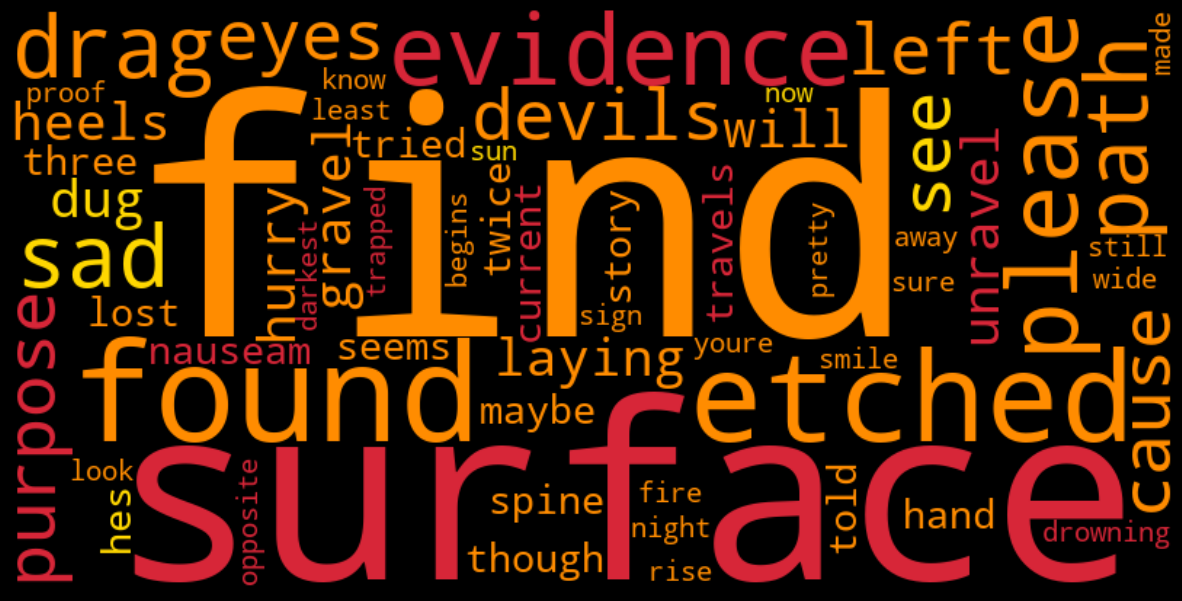

In [565]:
from wordcloud import WordCloud

# Create a single string where words are repeated based on frequency
text_for_cloud = " ".join(word_list)

# Custom color function: Redder for longer words, Yellower for shorter
def color_by_length(word, font_size, position, orientation, random_state=None, **kwargs):
    length = len(word)
    if length <= 3: return "rgb(255, 215, 0)"   # Yellow
    elif length <= 6: return "rgb(255, 140, 0)" # Orange
    else: return "rgb(215, 38, 56)"             # Red

wc = WordCloud(background_color="black", width=800, height=400,
               color_func=color_by_length).generate(text_for_cloud)

plt.figure(figsize=(15, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('breach_length_distribution.png', format='png', bbox_inches='tight')

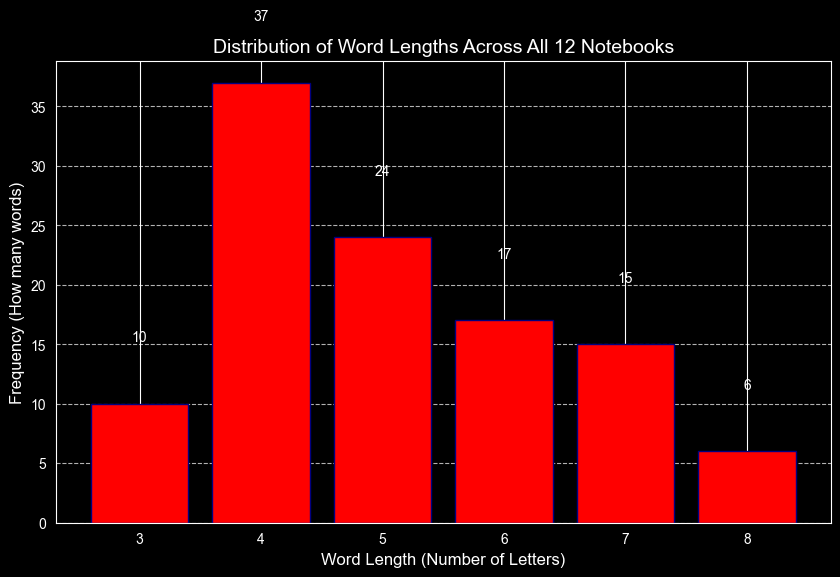

In [566]:
import matplotlib.pyplot as plt

# 1. Prepare the data
# We sort the lengths (keys) so the X-axis goes 1, 2, 3...
lengths = sorted(word_lengths.keys())
counts = [len(word_lengths[l]) for l in lengths]

# 2. Create the Bar Chart
plt.figure(figsize=(10, 6))
bars = plt.bar(lengths, counts, color='red', edgecolor='navy')

# 3. Add labels and title
plt.xlabel('Word Length (Number of Letters)', fontsize=12)
plt.ylabel('Frequency (How many words)', fontsize=12)
plt.title('Distribution of Word Lengths Across All 12 Notebooks', fontsize=14)

# 4. Make it look professional
plt.xticks(lengths)  # Ensures every length (1, 2, 3...) is labeled on the bottom
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Optional: Add the exact count on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 5, yval, ha='center', va='bottom')

plt.savefig('word_length_distribution.png')